# H1B Visas Applications Analysis

Stephen Fortin,
Jenny Liang,
Hector Restrepo

The [H1B Visa](https://en.wikipedia.org/wiki/H-1B_visa) program allows American companies hire international workers for specialized tasks. There is a cap of 65,000 visas granted annualy plus another 20,000 reserved for individuals with graduate studies. Universities, nonprofit research institutions, and government research facilities are exempted from this cap.

This year, much has been said about the program, both, on favor and against it. Nicole Torres covers this debate in her article for Harvard Business Review: [The H-1B Visa Debate, Explained](https://hbr.org/2017/05/the-h-1b-visa-debate-explained). SImilarly, Michale Li and others held a reseach for Data Scientist in: Hiring Data Scientists from Outside the U.S.: [A Primer on Visas](https://hbr.org/2016/09/hiring-data-scientists-from-outside-the-us-a-primer-on-visas?referral=03758&cm_vc=rr_item_page.top_right).

Prior to filing the H-1B petition with the USCIS, an employer must file a LCA with the Department of Labor. A Labor Condition Application ("LCA") is used by employers as supporting evidence for the petition for an H-1B visa.
DOL disclosure data does not indicate the employer's intended use for the LCA, however, it gives an stimate on the numbers and it is the most complete source of information.

With this in mind, we wanted to understand which jobs and at which states are currently using more these visas, and therefore, would potentially be more affected in case that no longer being able to use the program in the same way.

Similarly, we wanted to understand the prevailing wage for the applications as many of the detractors argue there is no control in this area. Lastly, we wanted to understand if there is any particular trend for current technologies, especially for data science and business analytics. 

For this analysis, we took the reported numbers by the Department of Labor to understand the trends and extract insights about the process.

Other available information sources are:

#### USCIS recently disclosed new information: [Buy American, Hire American: Putting American Workers First](https://www.uscis.gov/laws/buy-american-hire-american-putting-american-workers-first) 

#### Non-inmigrant admission [U.S. Nonimmigrant Admissions](https://www.dhs.gov/immigration-statistics/nonimmigrant)

#### Wage information[Wage and Hour Division (WHD)](https://www.dol.gov/whd/immigration/h1b.htm)

In [46]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.close()
import seaborn as sns
import sys
from pprint import pprint

%matplotlib inline
sns.set()

#Get rid of warnings
pd.options.mode.chained_assignment = None  # default='warn'

#Define style for printing text
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

#Check versions    
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)

Python version: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.20.1
Matplotlib version:  2.0.2
Seaborn version:  0.7.1


# Data Source Exploration and Cleaning

For this analysis we used data from 2011 to 2016 available here: [Data Source](https://www.kaggle.com/nsharan/h-1b-visa/downloads/h1b_kaggle.csv). Due to the size of the file, we suggest you to download the file from [this source](https://drive.google.com/file/d/1SQQP0oCoX5-e1wsKPg1EBz-nE6HRShWu/view?usp=sharing) and run the code with the file in your local disk changing the location in the variable 'csv'. 

We compared with the original data and it was consistent. Therefore, for the purpose of this analysis we will work with the dataset above. For the original data sources please visit:

[2011](https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_iCert_LCA_FY2011_Q4.xlsx)
[2012](https://www.foreignlaborcert.doleta.gov/docs/py2012_q4/LCA_FY2012_Q4.xlsx)
[2013](https://www.foreignlaborcert.doleta.gov/docs/lca/LCA_FY2013.xlsx)
[2014](https://www.foreignlaborcert.doleta.gov/docs/py2014q4/H-1B_FY14_Q4.xlsx)
[2015](https://www.foreignlaborcert.doleta.gov/docs/py2015q4/H-1B_Disclosure_Data_FY15_Q4.xlsx)
[2016](https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_Disclosure_Data_FY16.xlsx)

For reference, you can also check the data for [2008](https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_Case_Data_FY2008.xlsx), [2009-1](https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_Case_Data_FY2009.xlsx),[2009-2](https://www.foreignlaborcert.doleta.gov/docs/lca/Icert_%20LCA_%20FY2009.xlsx) and [2010](https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_FY2010.xlsx).

We are identifying trends and global numbers for the analysis. We will remove non assigned values as they create noise. Outliers will be identified and we'll take actions accordingly.

In [95]:
#read data
csv = 'C:/Users/usuario1/Desktop/DBC_P1/h1b.csv'
data=pd.read_csv(csv)
print(data.shape)
data = data.dropna() #Drop missing values
print(data.shape)
data.head(5)

(3002458, 11)
(2877765, 11)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


Prevailing wage is the only non categorical data. We will find the outliers in that category

In [96]:
data['CASE_STATUS'] = data.CASE_STATUS.str.upper()
data['EMPLOYER_NAME'] = data.EMPLOYER_NAME.str.upper()
data['SOC_NAME'] = data.SOC_NAME.str.upper()
data['JOB_TITLE'] = data.JOB_TITLE.str.upper()

data.PREVAILING_WAGE.describe().apply(lambda x: format(x, 'f'))

count       2877765.000000
mean         145166.648884
std         5307856.174739
min               0.000000
25%           54600.000000
50%           65125.000000
75%           81515.000000
max      6997606720.000000
Name: PREVAILING_WAGE, dtype: object

There are clearly a set of outliers in the data. We are particularly interested in those values over 1M and under the minimum wage of 15k a year

In [97]:
#Prevailing wage under 15K (minimum wage)
print(data[data.PREVAILING_WAGE <= 15000].PREVAILING_WAGE.count())
#Wage over 1M
print(data[data.PREVAILING_WAGE > 1000000].PREVAILING_WAGE.count())

80
1878


In [98]:
data[data.PREVAILING_WAGE > 1000000].groupby('CASE_STATUS'
                                            ).PREVAILING_WAGE.count()

CASE_STATUS
CERTIFIED                50
CERTIFIED-WITHDRAWN       5
DENIED                 1650
WITHDRAWN               173
Name: PREVAILING_WAGE, dtype: int64

In [99]:
data[data.PREVAILING_WAGE < 15000].groupby('CASE_STATUS'
                                          ).PREVAILING_WAGE.count()

CASE_STATUS
CERTIFIED              15
CERTIFIED-WITHDRAWN    12
DENIED                 49
WITHDRAWN               2
Name: PREVAILING_WAGE, dtype: int64

In [100]:
data[data.PREVAILING_WAGE < 15000].groupby('FULL_TIME_POSITION'
                                          ).PREVAILING_WAGE.count()

FULL_TIME_POSITION
N    22
Y    56
Name: PREVAILING_WAGE, dtype: int64

Compared to the size of the dataset the amount of outliers is not relevant. In addition to that, most of the applications with salaries over 1M were denied. It is possible that those were just errors in the filing process. For this analysis we will remove the salaries over 1M since do not show any trend and we will keep those under 15K

In [101]:
data = data[data.PREVAILING_WAGE < 1000000]

# Exploring Data Analysis

### Exploring H1B Visa Applications by State and Employer

Where are the skilled foreigners going?

In [139]:
# We separate the State and City to run analysis by state
data['STATE']= data['WORKSITE'].str.split(',').str[1]
data['CITY']= data['WORKSITE'].str.split(',').str[0]
#Remove spaces
data.STATE = data.STATE.str.strip()
data.CITY = data.CITY.str.strip()

In [140]:
#Add a counter for pivoting
data['count'] = 1

In [156]:
#What is the amount of applications and average wage in the country?
codes = pd.read_csv('https://github.com/jasonong/List-of-US-States/raw/master/states.csv')
codes.rename(columns={'State':'STATE', 'Abbreviation':'CODE'}, inplace=True)
codes.STATE = codes.STATE.str.upper()
codes = codes.set_index('STATE')

states = data[['STATE','PREVAILING_WAGE','count']].groupby('STATE').agg({'PREVAILING_WAGE': 'mean', 'count': 'sum'}).dropna()
states['text'] = 'Avr. Wage '+states['PREVAILING_WAGE'].astype(str)
states = pd.concat([states, codes], axis=1)

In [158]:
#Plot the information of the application with average wages
py_data = [dict(type='choropleth', autocolorscale=False, locations = states.CODE, 
                z= states['count'], locationmode='USA-states', text = states['text'], 
                colorscale = 'custom-colorscale', colorbar= dict(title="H1B Applications"))]

layout = dict(title='Number of H1B Applications', 
              geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes = True, lakecolor = 'rgb(66,165,245)',),)

fig = dict(data=py_data, layout=layout)

py.iplot(fig, filename='d3-choropleth-map')

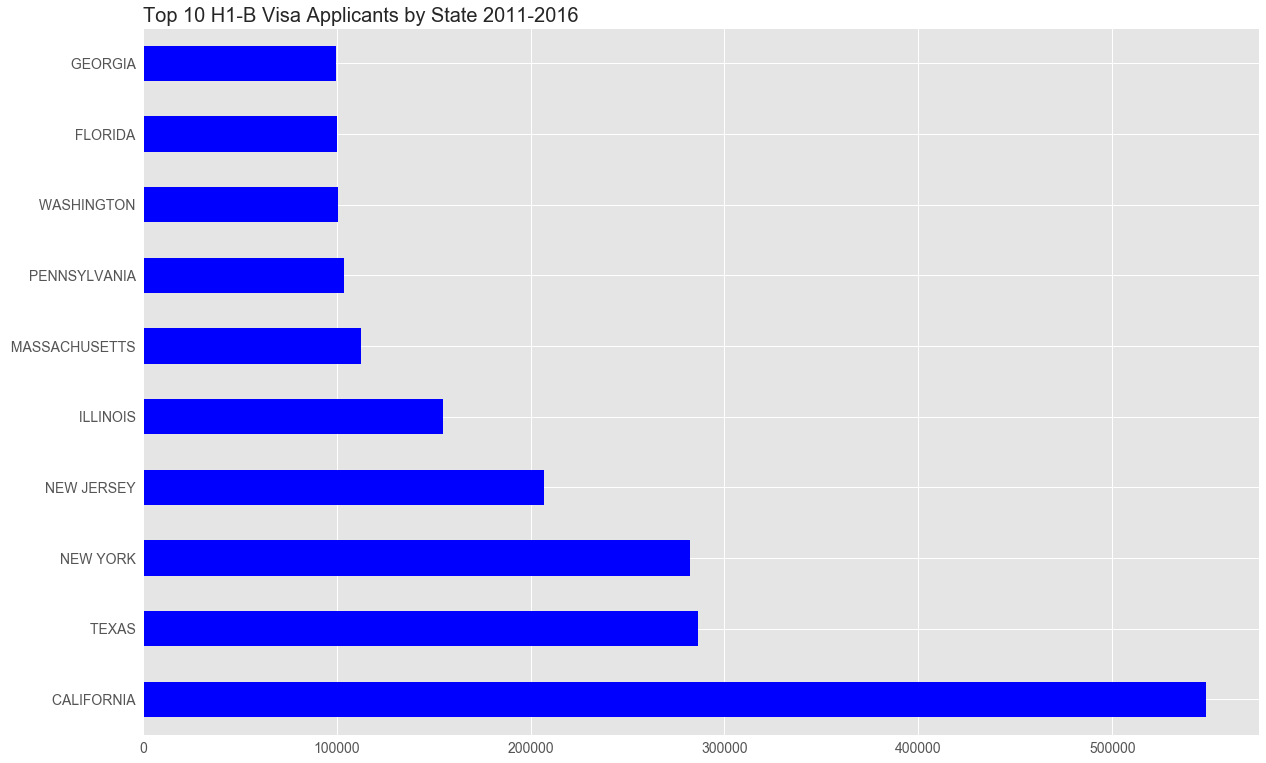

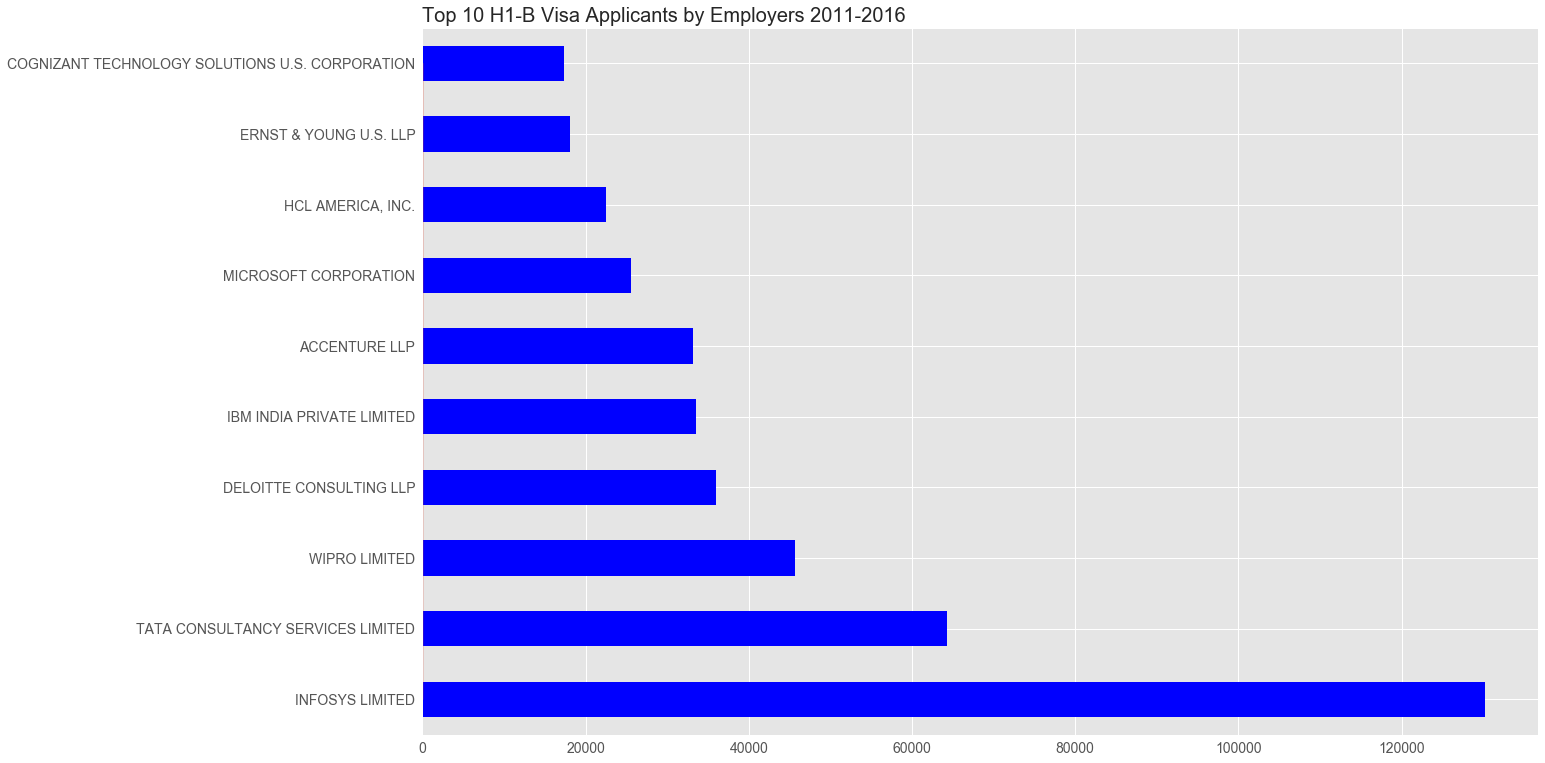

In [9]:
# Bar chart of H1B Visa Applications by State
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_title('Top 10 H1-B Visa Applicants by State 2011-2016', loc='left', fontsize=20)

data['STATE'].value_counts()[:10].plot(ax=ax, kind='barH', fontsize=14, figsize=(20,13), color = 'blue')
plt.plot(range(10))
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Top 10 H1-B Visa Applicants by Employers 2011-2016', loc='left', fontsize=20)

data['EMPLOYER_NAME'].value_counts()[:10].plot(ax=ax2, kind='barH', fontsize=14,figsize=(20,13), color = 'blue')
plt.plot(range(10))
plt.show()


The data shows that the greatest employeers are technology companies, especially those in the field of IT services. It is not suprise then that the states with the most applications are technology and/or service hubs.

### Exploring H1B Visa Applications by Job Title at the Top 20 Employers

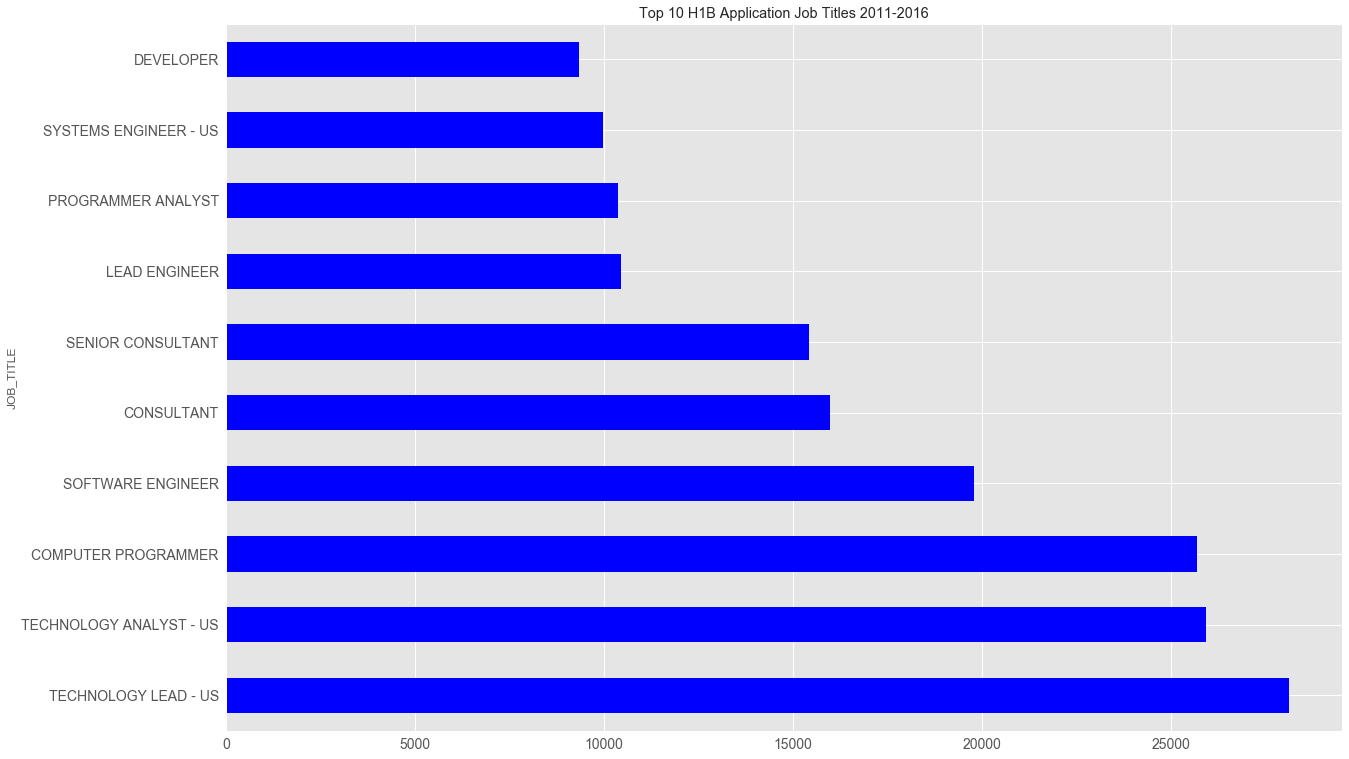

In [10]:
# Job title of top 20 h1b companies
top_20=data.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_20_df=data.loc[data.EMPLOYER_NAME.isin(top_20)]
top_20_df.groupby('JOB_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh', fontsize=14, figsize=(20,13),title='Top 10 H1B Application Job Titles 2011-2016',color = 'blue')

plt.plot(range(10))
plt.show()

# Insight
# TOP 10 job title of the TOP20 companies look like all in IT

### The Salary of 20 Most Common Job Title

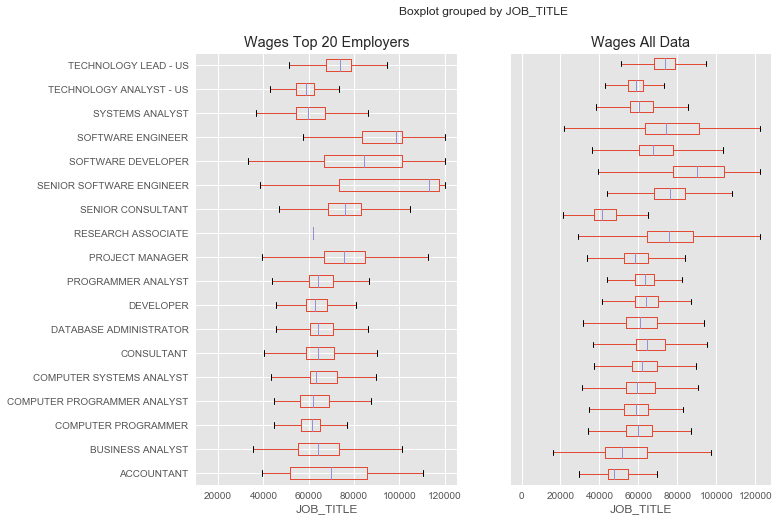

In [11]:
# The salary of 20 most common job title in comparison with all others
common_jobs=data.groupby('JOB_TITLE').EMPLOYER_NAME.count().sort_values(ascending=False).index[0:20]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

top_20_df_common_jobs = top_20_df[top_20_df.JOB_TITLE.isin(common_jobs)]
top_20_df_common_jobs = top_20_df_common_jobs[top_20_df_common_jobs.PREVAILING_WAGE <=top_20_df_common_jobs.PREVAILING_WAGE.quantile(0.99)]
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[0])

data_common_jobs=data[data.JOB_TITLE.isin(common_jobs)]
data_common_jobs=data_common_jobs[data_common_jobs.PREVAILING_WAGE<=data_common_jobs.PREVAILING_WAGE.quantile(0.99)]
data_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[1])

axes[0].set_title('Wages Top 20 Employers')
axes[1].set_title('Wages All Data')

plt.yticks([])
plt.plot(range(1))
plt.show()

# Insight
# Companies that file H1Bs are paying median if not more prevailing wage for the 20 most common jobs

### Exploring H1B Visa Applications by Position

In [76]:
#Applications have different categories
data.groupby('YEAR').CASE_STATUS.value_counts()

YEAR    CASE_STATUS                                       
2011.0  CERTIFIED                                             287610
        DENIED                                                 25632
        CERTIFIED-WITHDRAWN                                    10835
        WITHDRAWN                                               9130
2012.0  CERTIFIED                                             335667
        CERTIFIED-WITHDRAWN                                    29728
        DENIED                                                 18500
        WITHDRAWN                                               9974
2013.0  CERTIFIED                                             366377
        CERTIFIED-WITHDRAWN                                    34123
        WITHDRAWN                                              10898
        DENIED                                                 10611
        PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED        15
2014.0  CERTIFIED                           

In [40]:
#Withdrawn cases might repeat, therefore will be ignored for this analysis. 
#Withdrawn registers are due to contract termination 
certified = data[~data['CASE_STATUS'].str.contains('WITHDRAWN')]
print(certified.SOC_NAME.value_counts().nlargest(n=5))

COMPUTER SYSTEMS ANALYSTS                462520
SOFTWARE DEVELOPERS, APPLICATIONS        366832
COMPUTER PROGRAMMERS                     354734
COMPUTER OCCUPATIONS, ALL OTHER          162919
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     74654
Name: SOC_NAME, dtype: int64


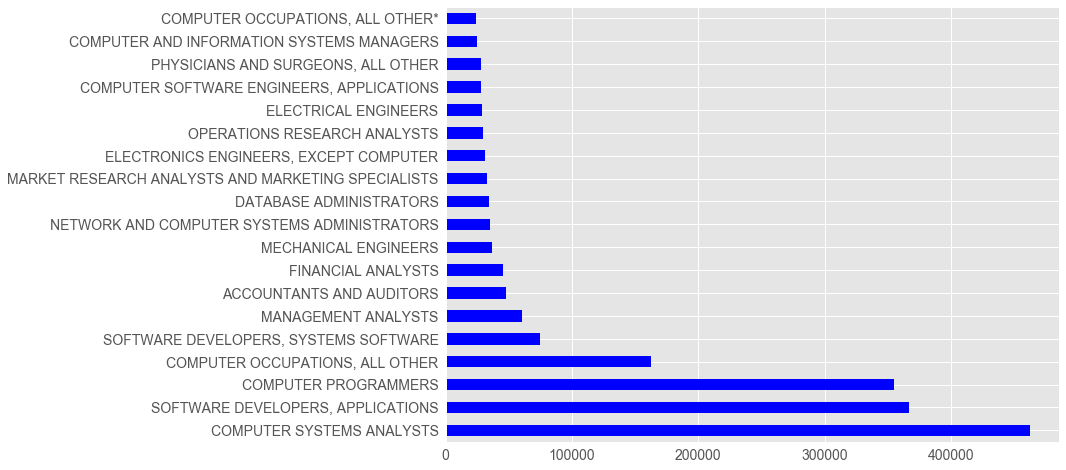

In [41]:
fig_l, ax_l = plt.subplots(figsize=[11,8])
certified.SOC_NAME.value_counts()[0:19].plot(
    kind='barh',fontsize=14,ax=ax_l, color = 'blue')

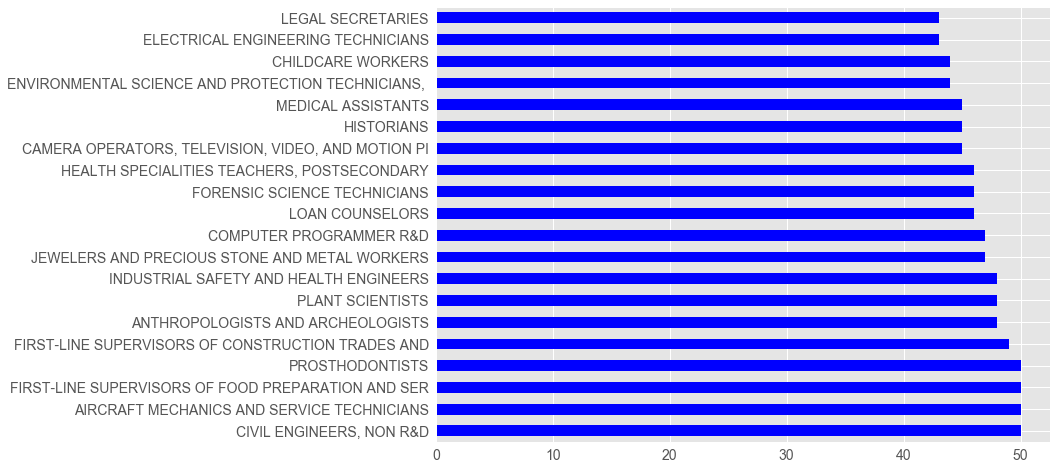

In [42]:
fig_s, ax_s = plt.subplots(figsize=[11,8]) 
#Take those with more than 40 to avoid those with few entries for making the analysis clearer 
certified.SOC_NAME.value_counts().where(lambda x : x > 40).dropna().nsmallest(n=20).sort_values(ascending=False).plot(
    kind='barh',fontsize=14,ax=ax_s, color='blue')

At the top of the list are the occupations related with Software development, but at the bottom it is more diverse. However, it might exist some overlaping along the name of the occupation, for instance, it is hard to differentiate the tasks performed by a Computer Programmer and a Computer Analyst.

# Careers in Business Analytics and Data

Much had been said about careers in data. We would like to know if there is an increase in the demand for these type of professionals and if we see those trends in the H1B requests.

To analyze the careers in data, we had created nine categories based on the common skills. This allow us to have a wider understanding of the market behavior. The categories defined area are as follows:

**ANALYST** = It applies across industries with diverse skillsets. Only Data Analysts are considered.

**CONSULTANT** = External resources that help at different stages of the data transformation and analysis process.

**ENGINEER** = They are usually involved in the data generation stage, where the data is extracted from different sources.

**SCIENTIST** = Encompass a sophisticated skillset aimed at getting data insights.

**WAREHOUSE** = Data wareohouse professionals. Fundamental component of Business Intelligence.

**DATABASE** = Less relevant for this analysis. They manage databases for companies.

**MANAGER** = Anyone with a lead role.

**MACHINE LEARNING** = Machine learning, deep learning and neural network professionals.

**ARCHITECT** = Data systems designers.


In [16]:
searchfor = ['DATA', 'ANALYTICS','MACHINE LEARNING', 'DEEP LEARNING', 'NEURAL NETWORK', 'ARTIFICIAL INTELLIGENCE']

data_careers = data.loc[data.JOB_TITLE.str.contains('|'.join(searchfor))]

data_careers['category'] = 'other'

#Assign categories using key words. This was done via data exploration but not included in this notebook
#Machine Learning category might be in the 'scientist' category but we wanted to discover the use of new terminology

data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('CONSULT'),'category'] = 'consultant'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('ANAL|LYST|ASSOCIATE|DEVELOP|SAS'),'category'] = 'analyst'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('ENGIN|MODEL|MIGRA|ETL|MINE|MINING|PROGRAM|DESIGNER'),'category'] = 'engineer'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('SCIEN|SPECIAL'),'category'] = 'scientist'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('WAREHOUS'),'category'] = 'warehouse'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('DATABASE|BASE|DBA|ADMIN'),'category'] = 'database'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('MANAGE|DIRECT|LEAD|CHIEF|HEAD|VICE|STRATE|OFFICE|VP|COORD'),'category'] = 'manager'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('ARCHI'),'category'] = 'architect'
data_careers.loc[data_careers.loc[:,'JOB_TITLE'].str.contains('MACHINE|DEEP|INTELLIGENCE|NEURAL'),'category'] = 'machine learning'

In [17]:
print(style.BOLD + 'Categories:' + style.END)
print('\n', data_careers['category'].value_counts(),'\n') 
print(style.BOLD + 'Wage Statistics:' + style.END)
print('\n',data_careers.PREVAILING_WAGE.describe().apply(lambda x: format(x, 'f')))

Categories:

 database            32558
analyst             13766
manager              7540
warehouse            4543
engineer             4503
scientist            4487
architect            2371
machine learning      767
other                 251
consultant            197
Name: category, dtype: int64 

Wage Statistics:

 count     70983.000000
mean      71650.538759
std       22386.358392
min       15080.000000
25%       56638.200000
50%       66872.000000
75%       82701.000000
max      985920.000000
Name: PREVAILING_WAGE, dtype: object


In [18]:
def wage_boxplot(data,title):
    order = data.groupby('category')['PREVAILING_WAGE'].median().fillna(0).sort_values()[::-1].index
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})    
    fig, ax = plt.subplots(figsize=[16,8])    
    ax = sns.boxplot(x="category", y="PREVAILING_WAGE", data=data, order=order, color='lightblue')
    ax.set_title('Pravailing Wage for Data Careers'+title)
    medians = data.groupby(['category'])['PREVAILING_WAGE'].median().sort_values(ascending=False).values
    median_labels = [str(np.round(s, 2)) for s in medians]
    pos = range(len(medians))   
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
                horizontalalignment='center', size='small', color='black') #, weight='semibold'

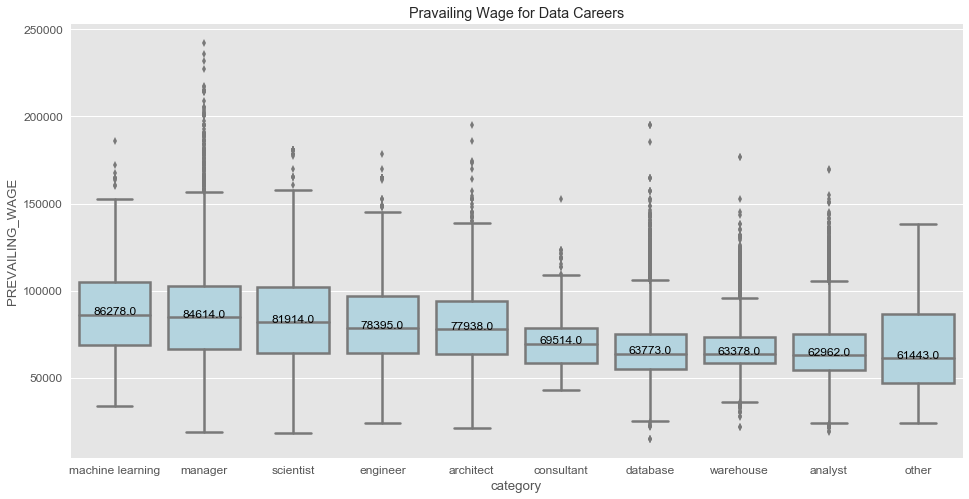

In [19]:
#We are interested in the average, take out salaries over 400k 
#to improve visibility 
wage_boxplot(data_careers[data_careers.PREVAILING_WAGE<400000],'')

In [20]:
evol = data_careers.groupby(['YEAR','category'])['count'].sum().reset_index().sort_values(by=['YEAR','category'],ascending=[True,True])
#reshape the original df to print 
df = pd.DataFrame(evol['count'].T.as_matrix().reshape(6,10), columns = evol.category.drop_duplicates().as_matrix(), index=evol.YEAR.drop_duplicates().as_matrix())
df

,analyst,architect,consultant,database,engineer,machine learning,manager,other,scientist,warehouse
2011.0,1003,202,22,3500,322,38,678,41,104,457
2012.0,1195,197,22,4157,418,58,778,23,185,492
2013.0,1373,351,27,4490,502,83,929,34,319,604
2014.0,2230,464,29,5639,718,134,1320,37,668,846
2015.0,3247,544,53,7115,1006,202,1703,50,1277,1121
2016.0,4718,613,44,7657,1537,252,2132,66,1934,1023


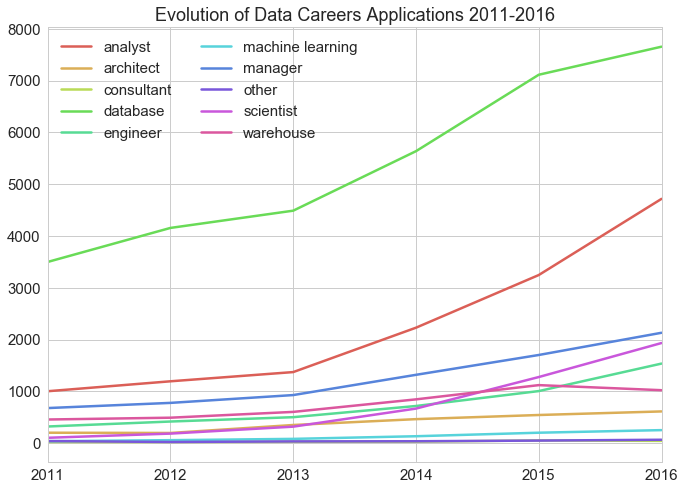

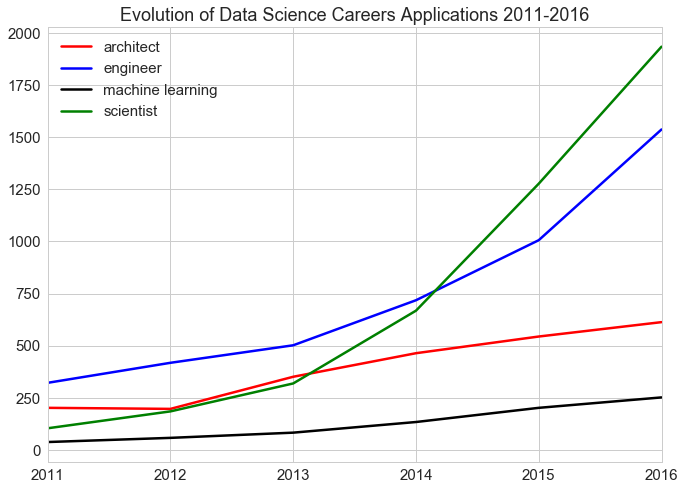

In [21]:
#Set plotting style
sns.set_style("whitegrid")
plt.style.use("seaborn-bright")
sns.set_palette('hls',10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#Plot
fig, ax = plt.subplots(figsize=[11,8])
ax.set_title('Evolution of Data Careers Applications 2011-2016')
df.plot(ax=ax)
plt.legend(ncol = 2, loc='upper left')

#Focus on the Data Science titles
fig2, ax2 = plt.subplots(figsize=[11,8])
ax2.set_title('Evolution of Data Science Careers Applications 2011-2016')
#strong colors to read better
colors = ['red','blue','black','green']
df.iloc[:,[1,4,5,8]].plot(ax=ax2, color=colors)

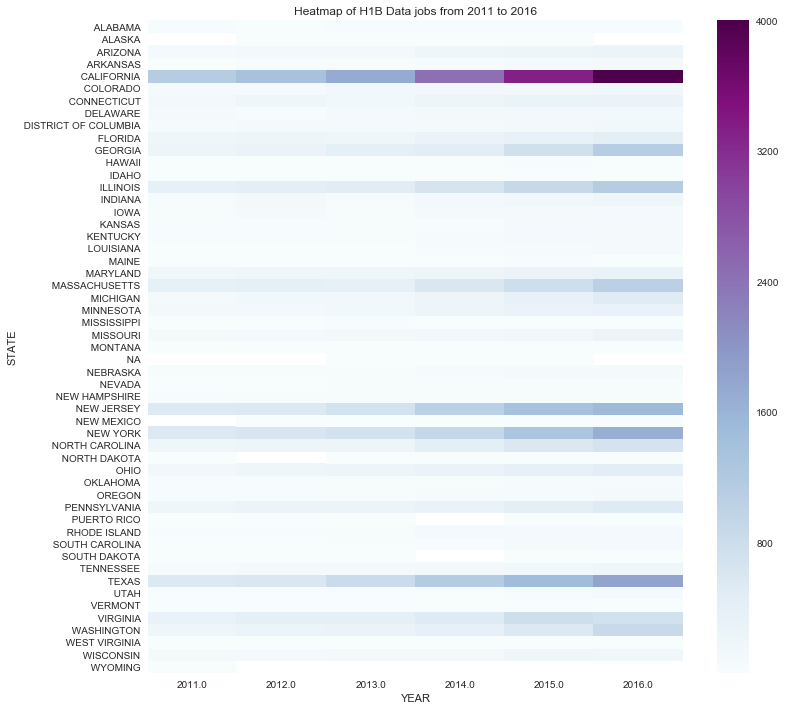

In [22]:
#Where are Data Professionals hired?
data_careers.reset_index() #avoid issue for pivot
data_careers_matrix = data_careers[data_careers.STATE != 'NA'].groupby(['YEAR','STATE'])['count'].sum().reset_index().sort_values(by=['count','YEAR','STATE'],ascending=[False,True,True]).pivot('STATE','YEAR','count')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(data_careers_matrix, cmap='BuPu')
r.set_title("Heatmap of H1B Data jobs from 2011 to 2016")

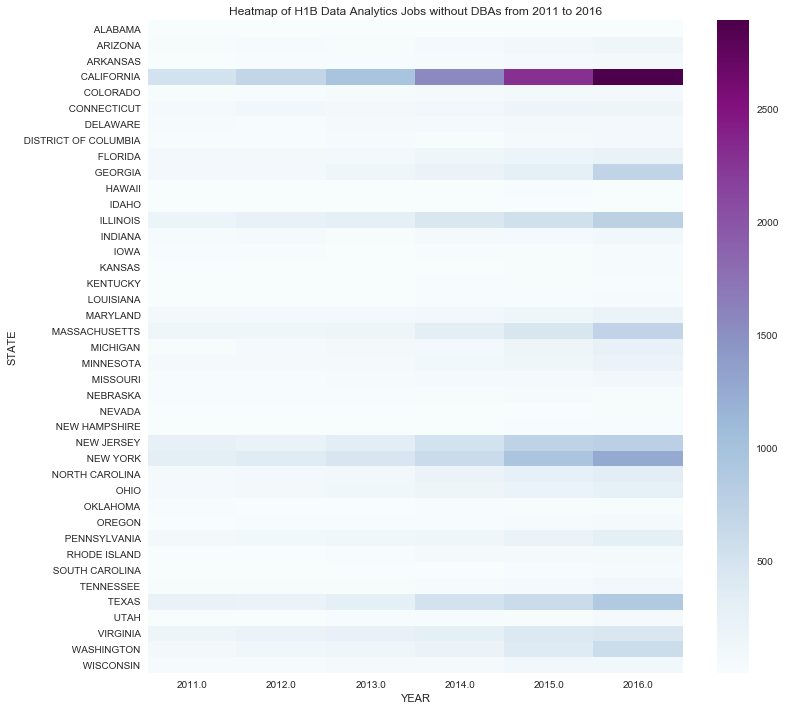

In [23]:
#We remove those states with NA applications and DBAs to improve visibility
analytics_matrix = data_careers[data_careers.category!='database'].groupby(
    ['YEAR','STATE'])['count'].sum().reset_index().sort_values(
    by=['YEAR','STATE'],ascending=[True,True]).pivot('STATE','YEAR','count')

analytics_matrix = analytics_matrix.dropna()
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(analytics_matrix, cmap='BuPu')
r.set_title("Heatmap of H1B Data Analytics Jobs without DBAs from 2011 to 2016")

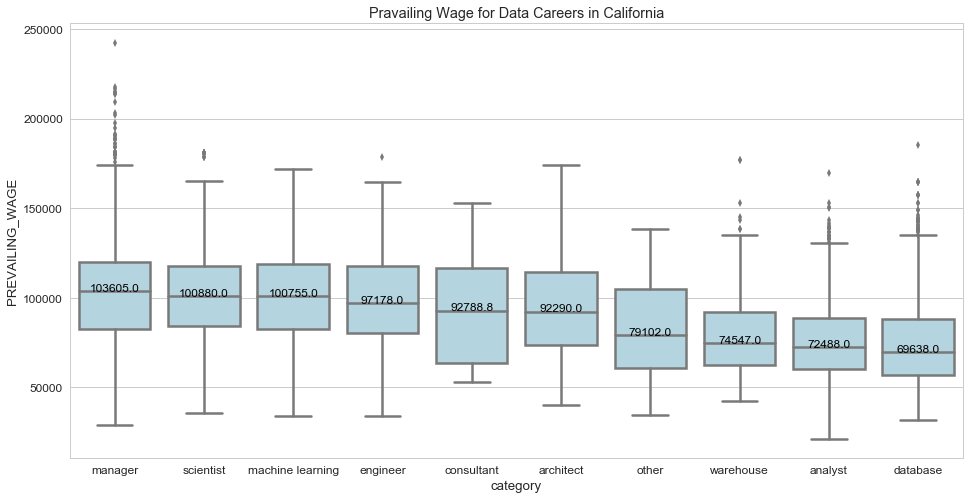

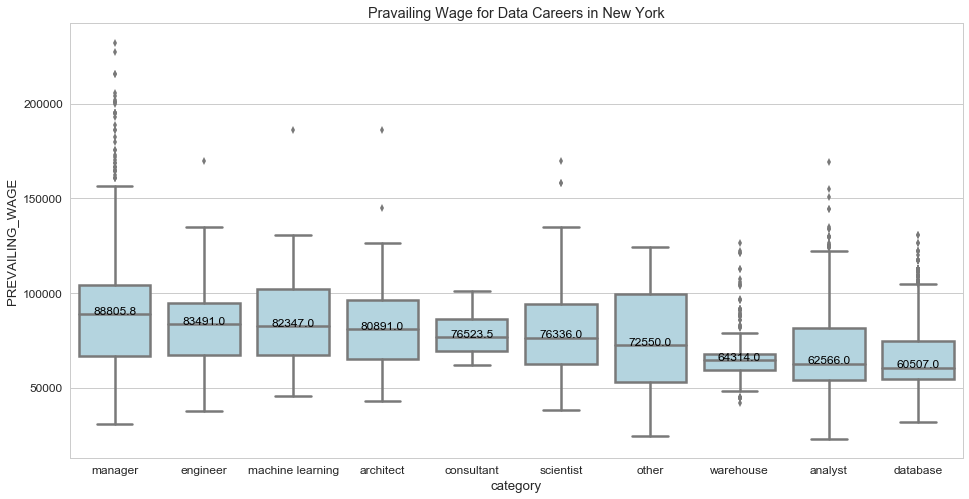

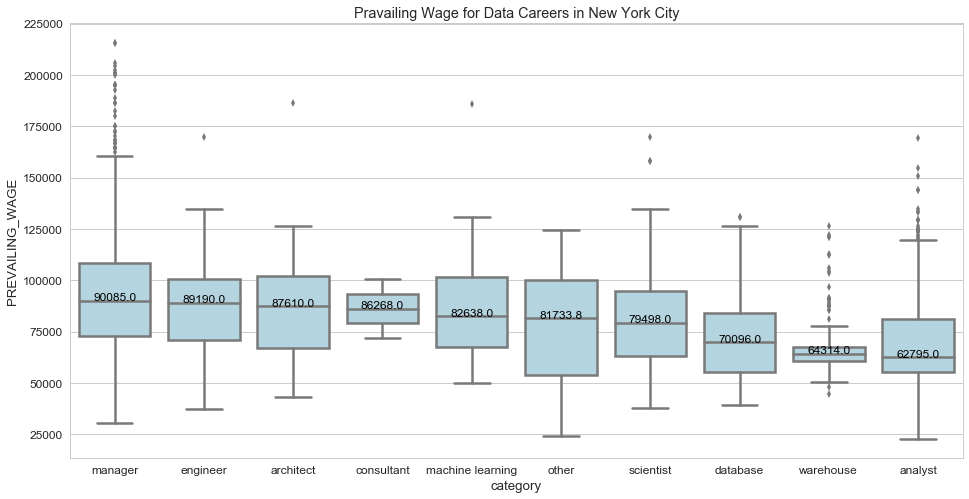

In [25]:
#What about the money?
wage_boxplot(data_careers[(data_careers.PREVAILING_WAGE<400000) & (data_careers.STATE == 'CALIFORNIA')],' in California')
wage_boxplot(data_careers[(data_careers.PREVAILING_WAGE<400000) & (data_careers.STATE == 'NEW YORK')], ' in New York')
wage_boxplot(data_careers[(data_careers.PREVAILING_WAGE<400000) & (data_careers.CITY == 'NEW YORK')], ' in New York City')

The data shows that for upcomming roles like data scientists and machine learning professionals it is better to be in California where most of the big tech companies are

In [66]:
#Follow the gold: Where in California and New York are the best payed Data Scientists and Machine Learning Specialists?
data_science = data_careers[
    ((data_careers.STATE == 'CALIFORNIA') | (data_careers.STATE == 'NEW YORK')) & 
    ((data_careers.category == 'scientist') | (data_careers.category == 'machine learning'))]

data_science_cal = data_science.loc[data_science.STATE == 'CALIFORNIA']
data_science_ny = data_science.loc[data_science.STATE == 'NEW YORK']

machine learning    8
scientist           8
Name: category, dtype: int64


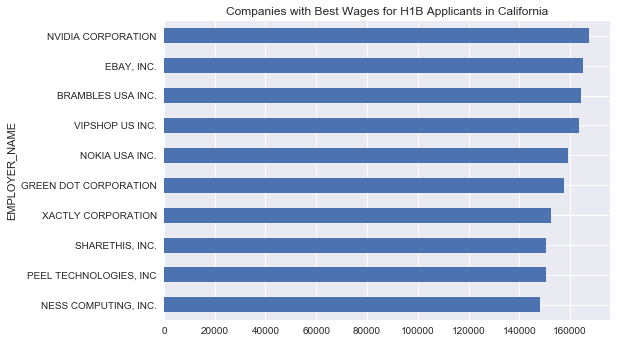

In [73]:
data_science_cal.groupby('EMPLOYER_NAME').PREVAILING_WAGE.mean().nlargest(10).sort_values(ascending=True).plot(kind='barh',title='Companies with Best Wages for H1B Applicants in California')
top_10_cal = data_science_cal.groupby('EMPLOYER_NAME').PREVAILING_WAGE.mean().nlargest(10).index.tolist()
print(data_science_cal.loc[data_science_cal.EMPLOYER_NAME.isin(top_10_cal)].category.value_counts())

scientist           13
machine learning     6
Name: category, dtype: int64


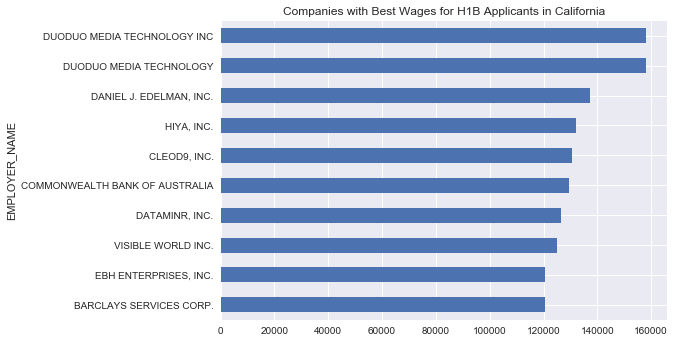

In [74]:
data_science_ny.groupby('EMPLOYER_NAME').PREVAILING_WAGE.mean().nlargest(10).sort_values(ascending=True).plot(kind='barh',title='Companies with Best Wages for H1B Applicants in New York')
top_10_ny = data_science_ny.groupby('EMPLOYER_NAME').PREVAILING_WAGE.mean().nlargest(10).index.tolist()
print(data_science_ny.loc[data_science_ny.EMPLOYER_NAME.isin(top_10_ny)].category.value_counts())

Although there are wages in California in the 4th percentile for American wages, those are scarce. In New York, on the other hand, the levels are not impressive. It is still better aiming for the C level.

In [ ]:
data_science.EMPLOYER_NAME = data_science.EMPLOYER_NAME.str.replace(',','') #To avoid problems with names

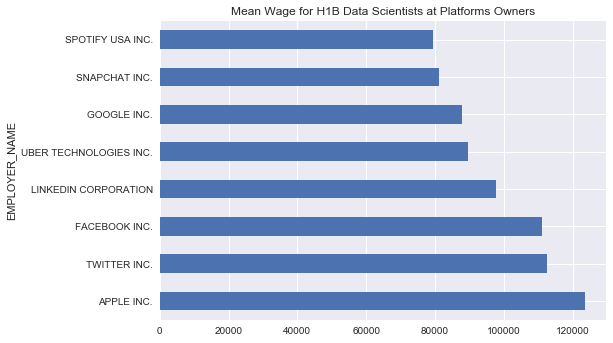

In [89]:
#What about platform owners as destination for Data Scientists?
platforms = 'GOOGLE|FACEBOOK|APPLE|SPOTIFY|UBER T|TWITTER|INSTAGRAM|SNAP|LINKED'
data_science.loc[data_science.EMPLOYER_NAME.str.contains(platforms)
                ].groupby('EMPLOYER_NAME').PREVAILING_WAGE.mean().sort_values(
                ascending=False).plot(kind='barh',title = 'Mean Wage for H1B Data Scientists at Platforms Owners')

The six figures paradigm seems elusive for foreign data scientists even at the big tech platforms. It is difficult, however, stimate the seniority of these individuals 

# What can we conclude from our observations?

To conclude, in this project, we performed exploratory data analysis on the H-1B visa petition disclosure data for the period 2011-2016. We found that most applicants are located in California, New Jersey, New York and Texas. The job opportunities that are most certified in these states are the programmer analysts,software engineers, computer programmers, systems analysts and software developers with H-1B visas.

We also observe an increase in the petitions for specialized skills in data analysis, but not extremely high wages.